# Spacetime Plotter Demo

This tool will assist in the creation of Minkowksi Spacetime Diagrams. This tool will account for phenomenon such as Lorentz Transformations and thus Velocity Boosts, Time Dilation, Length Contraction, and so on.

In [4]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled.")

Autoreload of imported modules enabled.


## Importing necessary classes and functions

Helper functions are located in `spacetime_plotter/plotter.py`. We will import the required classes and functions below.

In [5]:
from spacetime_plotter.plotter import WorldLine, Event, plot_diagram

## A Basic Spacetime Diagram

To plot a spacetime diagram, we must supply the `plot_diagram` function with various arguments. The first is a `list` of `event` and `worldline` objects. The second argument is a x and y bound for the graph. There are other arguments which will be detailed later.

To plot the spacetime diagram, the function must be given the list of objects, the graph limit, and also a worldline to represent the reference frame from which all observations are made.

In our first example, we can see that a stationary observer throws a firecracker at ct=0 and x=0, and the firecracker travels away at 0.25c. After the firecracker has traveled 1 meter away from the observer, it detonates. In the observer's inertial frame, we can find that the light from the explosion will reach them at ct=5. This is supported in the diagram below.

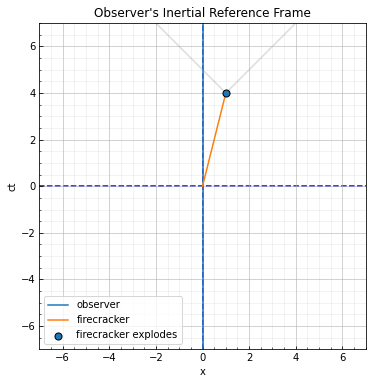

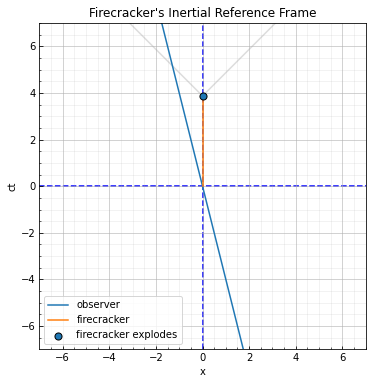

In [8]:
objects = [
    WorldLine("observer", point=(0,0), speed=0),
    WorldLine("firecracker", point=(0,0), speed=0.25, start=0, end=4),
    Event("firecracker explodes", point=(1,4), draw_lightline=True)
]
lim = (-7, 7)

plot_diagram(
    arr=objects, 
    limit=lim,
    title="Observer's Inertial Reference Frame",
    ref="observer"
)

plot_diagram(
    arr=objects, 
    limit=lim,
    title="Firecracker's Inertial Reference Frame",
    ref="firecracker"
)

As shown above, the inertial reference frame can also be easily shifted to other viewpoints without much work.

## Arguments and Parameters

### `WorldLine`
- `label`: A `str` object used to create the spacetime diagram"s legend. The label is also used to identify which worldline to use as as the inertial frame of reference.
- `point`: A `tuple` of two `float` objects which dictates a point in space and time respectively that a worldline intersects.
- `speed`: A `float` which defines the speed in which an object travels in the rest frame. Speed is represented as a fraction of the speed of light, ranging from 0 to 1.
- `start`: A `float` which defines the time that a worldline should begin.
- `end`: A `float` which defines the time that a worldline should stop.

### `Event`
- `label`: A `str` object used to create the spacetime diagram"s legend.
- `point`: A `tuple` of two `float` objects which dictates a point in space and time respectively in which the event occurs.
- `draw_lightline`: A `bool` value that defines whether the event should draw two "lightlines." These lines travel away from the event at the speed of light, and can be used to determine when an object is observed by another reference frame.

### `plot_diagram`
- `arr`: A `list` of various `worldline` and `event` objects. These objects are the one's used to create the spacetime diagram.
- `limit`: A `tuple` of two `float` objects. The first `float` determines the minimum x and ct bound of the graph, whereas the second `float` determines the maximum x and ct bound.
- `xlabel`: A `str` used to give a label to the x axis of the graph. Defaults to `x`.
- `ylabel`: A `str` used to give a label to the y axis of the graph. Defaults to `ct`.
- `title`: A `str` which gives the header for the graph. Defaults to `Spacetime Graph`
- `ref`: A `str` which defines the inertial frame of reference used to determine the speeds of all worldlines and the positions of all events. This value must be a `label` of an existing `worldline` object.

## A more complicated example

A train is traveling down a track at 0.25 times the speed of light. One person is located in middle of the train, while a second person is located on a stationary platform. As the train passes the platform, the front and back ends are struck by lightning. We can use the spacetime plotter to determine when each person observes the two lightning strikes.

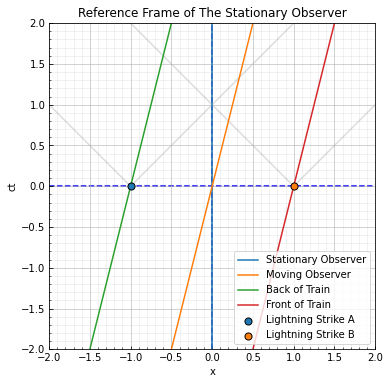

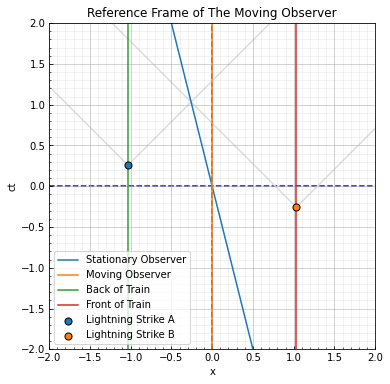

In [15]:
objects = [
    WorldLine("Stationary Observer", point=(0,0), speed=0),
    WorldLine("Moving Observer", point=(0,0), speed=0.25),
    WorldLine("Back of Train", point=(-1,0),speed=0.25),
    WorldLine("Front of Train", point=(1,0),speed=0.25),
    Event("Lightning Strike A", point=(-1,0),draw_lightline=True),
    Event("Lightning Strike B", point=(1,0),draw_lightline=True),
]
lim = (-2, 2)

plot_diagram(
    arr=objects,
    limit=lim,
    title="Reference Frame of The Stationary Observer",
    ref="Stationary Observer"
)

plot_diagram(
    arr=objects,
    limit=lim,
    title="Reference Frame of The Moving Observer",
    ref="Moving Observer"
)